In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.drop(columns = ['datetime', 'total'], inplace = True)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()
df_test.shape

In [2]:
df = pd.read_csv('hour.csv')
df.shape
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.drop(columns = ['instant', 'casual', 'registered'], inplace = True)

In [3]:
df['dteday'] = df['dteday'].map( lambda d: (d[8:]))
df['dteday'] = df['dteday'].astype('int')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_train = df[(df['dteday'] < 20)]
df_test = df[(df['dteday'] >= 20)]

print(df.shape)
print(df_train.shape)
print(df_test.shape)

(17379, 17)
(10886, 17)
(6493, 17)


In [5]:
df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.047372,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.047372,1.000000,-0.003052,0.002057,0.007929,0.001538,-0.010132,0.002145,0.008627,-0.003882,0.027180,0.021269,0.025663,0.010505,-0.003283,-0.004098,-0.004312
season,0.404046,-0.003052,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.002057,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.007929,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,0.001538,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.010132,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.002145,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.008627,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.003882,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [5]:
train_set = df_train.values
test_set = df_test.values

np.max(train_set[:,1])

19.0

In [ ]:
mean_year = np.sum(train_set[:,11])/2
print(mean_year)

In [ ]:
mean_month = np.sum(train_set[:,11])/24
print(mean_month)

In [ ]:
plt.figure(figsize=(8,8))


plt.scatter(train_set[:,11], train_set[:,16])
plt.title("Count vs temp")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.show()

In [ ]:
plt.figure(figsize=(8,8))


plt.scatter(train_set[:,5], train_set[:,16])
plt.title("Count vs temp")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.show()

In [ ]:
train_set[:,16]

In [ ]:
train_set[:,5]

In [6]:
y = train_set[:,16]
y.shape = (train_set.shape[0],1)
x = train_set[:, 2:14]
one = np.ones((x.shape[0], 1))
x = np.append(one, x, axis = 1)
print(x)
print(x.shape)
print(y)
print(y.shape)

[[1.     1.     0.     ... 0.2879 0.81   0.    ]
 [1.     1.     0.     ... 0.2727 0.8    0.    ]
 [1.     1.     0.     ... 0.2727 0.8    0.    ]
 ...
 [1.     4.     1.     ... 0.3182 0.61   0.2239]
 [1.     4.     1.     ... 0.3485 0.61   0.0896]
 [1.     4.     1.     ... 0.3333 0.66   0.1343]]
(10886, 13)
[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
(10886, 1)


In [ ]:
print(gradient(x, y, beta).shape)
gradient(x, y, beta)

In [ ]:
print(y.shape)
print(np.matmul(x, beta).shape)
print(np.exp(np.matmul(x, beta)).shape)
print(np.exp(np.matmul(x, beta) - y).shape)
print(x.shape)

In [ ]:
train_set.shape[0]
x.shape[1]

In [7]:
def gradient(x, y, beta):
    g = (np.exp(np.matmul(x, beta)) - y)*x
    res = np.sum(g, axis = 0)
    
    return res

In [9]:
def prediction(X, beta):
    lamda = np.exp(np.matmul(X, beta))
    
    return lamda

def rmse(y, y_cap):
    err = np.sqrt(np.sum((y_cap-y)**2)/float(y.shape[0]))
    
    return err

In [37]:
def sgd(x, y, alpha, iterations):
    #gradient descent method 
    beta = np.random.normal(scale = 1.0/x.shape[1], size = (x.shape[1], 1))  #initialize
    print("Initial beta", beta)
    
    m = np.matmul(x, beta)
    loss = np.sum((np.exp(m) - y*m))
    
    print(y.shape)
    print(prediction(x, beta).shape)
    
    error = rmse(y, prediction(x, beta))
    
    itr = 0
    print(error)
    #error = np.abs(np.asscalar(error))
    
    print(error)
    
    training_process = []
    while(itr < iterations):
        beta = beta - alpha*gradient(x, y, beta).reshape(beta.shape)
        
        #m = np.matmul(x, beta)
        #loss = np.sum((np.exp(m) - y*m))
        error = rmse(y, prediction(x, beta))
        training_process.append((itr, error))
        
        if(itr == 0 or itr%1000 == 0):
            print("Iteration : %d  Error = %f" %(itr, error))
        itr = itr+1
    
    error = rmse(y, prediction(x, beta))
    print("Iterations completed. Error = %f" %(error))
    
    return beta, training_process

In [ ]:
beta = sgd(x, y, 2*1e-9, 10000)

In [11]:
beta = sgd(x, y, 3*1e-9, 10000)

(10886, 1)
(10886, 1)
263.36688607162756
263.36688607162756
Iteration : 0  Error = 262.106451
Iteration : 500  Error = 194.120452
Iteration : 1000  Error = 179.986111
Iteration : 1500  Error = 172.843788
Iteration : 2000  Error = 171.312342
Iteration : 2500  Error = 166.991585
Iteration : 3000  Error = 163.450011
Iteration : 3500  Error = 160.787406
Iteration : 4000  Error = 158.690310
Iteration : 4500  Error = 156.973211
Iteration : 5000  Error = 155.523737
Iteration : 5500  Error = 154.272145
Iteration : 6000  Error = 153.173747
Iteration : 6500  Error = 152.198732
Iteration : 7000  Error = 151.326272
Iteration : 7500  Error = 150.541106
Iteration : 8000  Error = 149.831539
Iteration : 8500  Error = 149.188256
Iteration : 9000  Error = 148.603608
Iteration : 9500  Error = 148.071154


(10886, 1)
(10886, 1)
262.93076472862106
262.93076472862106
Iteration : 0  Error = 261.304469
Iteration : 500  Error = 230.643062
Iteration : 1000  Error = 206.656395
Iteration : 1500  Error = 192.622245
Iteration : 2000  Error = 183.547202
Iteration : 2500  Error = 177.262322
Iteration : 3000  Error = 172.659893
Iteration : 3500  Error = 169.141805
Iteration : 4000  Error = 166.362560
Iteration : 4500  Error = 164.107561
Iteration : 5000  Error = 162.235366
Iteration : 5500  Error = 160.648946
Iteration : 6000  Error = 159.280091
Iteration : 6500  Error = 158.080115
Iteration : 7000  Error = 157.013866
Iteration : 7500  Error = 156.055686
Iteration : 8000  Error = 155.186614
Iteration : 8500  Error = 154.392437
Iteration : 9000  Error = 153.662324
Iteration : 9500  Error = 152.987871
Iterations completed. Error = 152.363631


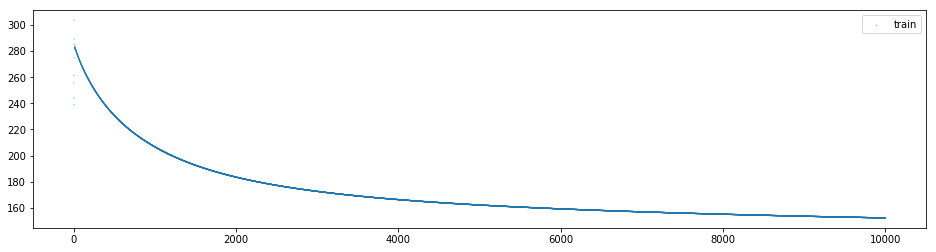

[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
[[ 2.31344714]
 [ 0.17150714]
 [ 0.5442215 ]
 [ 0.00306435]
 [ 0.05784626]
 [ 0.08235539]
 [ 0.04118863]
 [ 0.10684509]
 [-0.0322644 ]
 [ 1.0852328 ]
 [ 1.05641621]
 [-0.09020801]
 [ 0.7378691 ]]


In [26]:
beta, tr_set = sgd(x, y, 2*1e-9, 10000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

print(y)
print(beta)

('Initial beta', array([[-0.09852268],
       [ 0.02074795],
       [ 0.00896667],
       [ 0.02985922],
       [-0.00823657],
       [-0.102141  ],
       [-0.15455334],
       [-0.01930798],
       [ 0.03928828],
       [ 0.07548494],
       [ 0.09345081],
       [ 0.06711286],
       [ 0.035471  ]]))
(10886, 1)
(10886, 1)
263.04532438076825
263.04532438076825
Iteration : 0  Error = 262.580059
Iteration : 500  Error = 244.755523
Iteration : 1000  Error = 224.870864
Iteration : 1500  Error = 211.959637
Iteration : 2000  Error = 202.709973
Iteration : 2500  Error = 195.689434
Iteration : 3000  Error = 190.183018
Iteration : 3500  Error = 185.762070
Iteration : 4000  Error = 182.140540
Iteration : 4500  Error = 179.119008
Iteration : 5000  Error = 176.556021
Iteration : 5500  Error = 174.350069
Iteration : 6000  Error = 172.427330
Iteration : 6500  Error = 170.733210
Iteration : 7000  Error = 169.226560
Iteration : 7500  Error = 167.875738
Iteration : 8000  Error = 166.655937
Iteration 

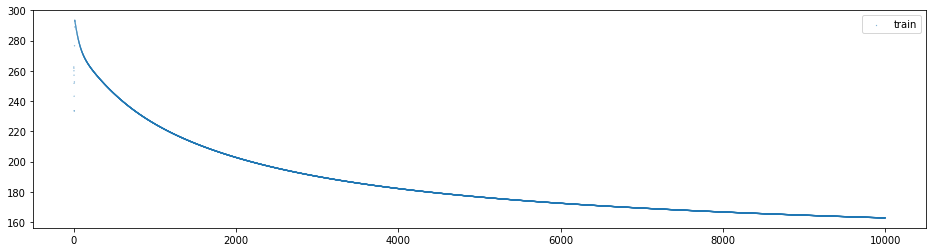

[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
[[ 1.6268305 ]
 [ 0.32582944]
 [ 0.63249639]
 [-0.03340639]
 [ 0.06703952]
 [ 0.04147722]
 [ 0.06195991]
 [ 0.20720306]
 [ 0.0257205 ]
 [ 1.08046772]
 [ 1.05330944]
 [ 0.14603337]
 [ 0.54228524]]


In [31]:
beta, tr_set = sgd(x, y, 1e-9, 10000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

print(y)
print(beta)

('Initial beta', array([[ 0.06291245],
       [ 0.03345549],
       [ 0.19739361],
       [ 0.14324273],
       [-0.11345085],
       [ 0.07603838],
       [ 0.06358789],
       [ 0.02901549],
       [-0.04781709],
       [-0.14118095],
       [ 0.09382891],
       [ 0.07866035],
       [-0.03502925]]))
(10886, 1)
(10886, 1)
262.81883284880894
262.81883284880894
Iteration : 0  Error = 261.306674
Iteration : 1000  Error = 202.399810
Iteration : 2000  Error = 181.680629
Iteration : 3000  Error = 171.552032
Iteration : 4000  Error = 165.586399
Iteration : 5000  Error = 161.635679
Iteration : 6000  Error = 158.781837
Iteration : 7000  Error = 156.577141
Iteration : 8000  Error = 154.789747
Iteration : 9000  Error = 153.293423
Iteration : 10000  Error = 152.014874
Iteration : 11000  Error = 150.908096
Iteration : 12000  Error = 149.941812
Iteration : 13000  Error = 149.093211
Iteration : 14000  Error = 148.344720
Iteration : 15000  Error = 147.682262
Iteration : 16000  Error = 147.094255
It

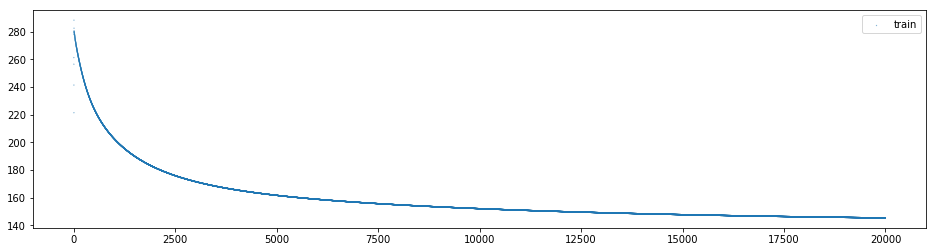

[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
[[ 3.01378267]
 [ 0.01533699]
 [ 0.49242023]
 [ 0.04884378]
 [ 0.05158293]
 [ 0.05338741]
 [ 0.02569579]
 [ 0.0512309 ]
 [-0.04654572]
 [ 0.82335659]
 [ 1.08060293]
 [-0.47664872]
 [ 0.74928699]]


In [33]:
beta, tr_set = sgd(x, y, 2*1e-9, 20000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

print(y)
print(beta)

('Initial beta', array([[ 0.01883523],
       [-0.03342616],
       [-0.02904535],
       [ 0.10583438],
       [ 0.08882927],
       [ 0.07214934],
       [ 0.07368208],
       [-0.11257923],
       [-0.0299087 ],
       [ 0.01261857],
       [ 0.06740852],
       [-0.11876971],
       [ 0.07574001]]))
(10886, 1)
(10886, 1)
257.3888902356273
257.3888902356273
Iteration : 0  Error = 243.086247
Iteration : 2500  Error = 173.885500
Iteration : 5000  Error = 160.701399
Iteration : 7500  Error = 155.115583
Iteration : 10000  Error = 151.687357
Iteration : 12500  Error = 149.295590
Iteration : 15000  Error = 147.551785
Iteration : 17500  Error = 146.252524
Iteration : 20000  Error = 145.269286
Iteration : 22500  Error = 144.515118
Iteration : 25000  Error = 143.929477
Iteration : 27500  Error = 143.469509
Iteration : 30000  Error = 143.104491
Iteration : 32500  Error = 142.812118
Iteration : 35000  Error = 142.575995
Iteration : 37500  Error = 142.383908
Iteration : 40000  Error = 142.22664

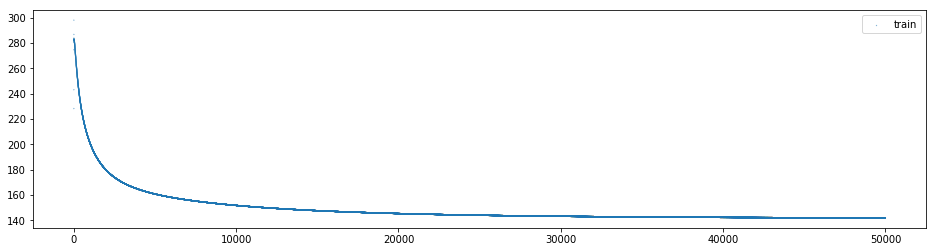

[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
[[ 3.65179923]
 [-0.06809743]
 [ 0.4567376 ]
 [ 0.07470564]
 [ 0.04692206]
 [-0.00459143]
 [ 0.01324819]
 [ 0.01376943]
 [-0.03480608]
 [ 0.7059838 ]
 [ 0.9276787 ]
 [-0.92271018]
 [ 0.52528731]]


In [36]:
beta, tr_set = sgd(x, y, 2*1e-9, 50000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

print(y)
print(beta)

('Initial beta', array([[-0.08604425],
       [-0.01912797],
       [ 0.04816453],
       [-0.11170564],
       [ 0.10426156],
       [ 0.08516178],
       [ 0.07769382],
       [ 0.01000189],
       [-0.05792376],
       [ 0.1002059 ],
       [-0.01019398],
       [-0.03059512],
       [ 0.00790322]]))
(10886, 1)
(10886, 1)
261.700624112139
261.700624112139
Iteration : 0  Error = 256.118331
Iteration : 1000  Error = 199.554107
Iteration : 2000  Error = 179.540528
Iteration : 3000  Error = 170.151442
Iteration : 4000  Error = 164.619591
Iteration : 5000  Error = 160.891256
Iteration : 6000  Error = 158.136831
Iteration : 7000  Error = 155.967961
Iteration : 8000  Error = 154.188465
Iteration : 9000  Error = 152.691242
Iterations completed. Error = 151.413279


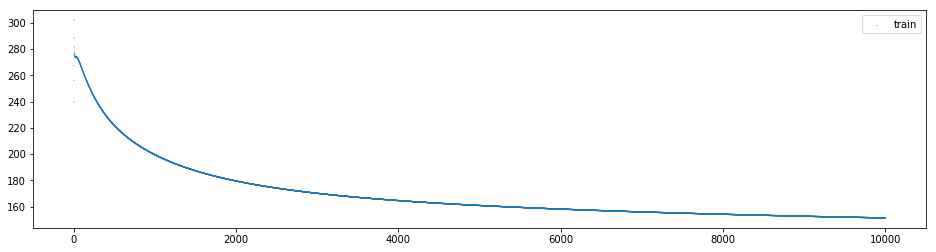

[[ 16.]
 [ 40.]
 [ 32.]
 ...
 [168.]
 [129.]
 [ 88.]]
[[ 2.39847763]
 [ 0.14231068]
 [ 0.5354161 ]
 [ 0.01150946]
 [ 0.05696659]
 [ 0.12131927]
 [ 0.03950303]
 [ 0.10294494]
 [-0.033516  ]
 [ 1.1243896 ]
 [ 1.00976549]
 [-0.14148778]
 [ 0.71642556]]


In [43]:
beta, tr_set = sgd(x, y, 2.2*1e-9, 10000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

print(y)
print(beta)

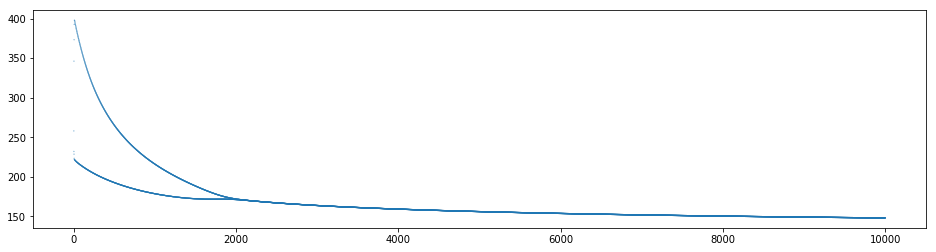

In [24]:
#3e-9 traning
p = np.array(tr_set)

s = 0.5*np.ones(len(tr_set))
plt.figure(figsize=((16,4)))
plt.scatter(p[:, 0], p[:, 1], s=s, label = 'train')

In [28]:
p[p.shape[0]-1, :]

array([9999.        ,  147.89551193])